In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

x, y = make_classification(n_samples=25, n_features=1, n_informative=1, n_clusters_per_class=1, n_redundant=0, random_state=42)

x = np.squeeze(x)

class Log_reg:
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        
        n_iter = 100
        nu = 0.1
        self.a = 1
        self.b = 1
        
        self.pred = 1 / (1 + np.exp(-(self.a * self.x + self.b)))
        
        for i in range(n_iter):
            
            err = self.y - self.pred    
            
            a_change = self.x * err
            b_change = err
            
            self.a += nu * a_change.mean()
            self.b += nu * b_change.mean()
            
            self.pred = 1 / (1 + np.exp(-(self.a * self.x + self.b)))
            
            err = self.y - self.pred
            
            abs_err = np.abs(err)
            
            l = self.y * (np.log(self.pred)) + (1 - self.y) * (np.log(1 - self.pred))
            
            if i % 10 == 0:
                print(l.mean())
                
        print('Log_Reg: fit')
        
    def pred_proba(self, X_):
        return self.a * X_ + self.b


    def predict(self, X_):
        return np.where(self.pred_proba(X_) >= 0.5, 1, 0) 
           
                
                
model = Log_reg()
model.fit(x, y)
             

-0.41297782939198896
-0.3091278016978859
-0.24481579014804955
-0.20294995332967353
-0.17424384504437548
-0.15362950499665431
-0.1382347758001881
-0.12635564210512068
-0.11693504473407958
-0.10929020160385304
Log_Reg: fit


In [2]:
y_pred = model.predict(x)
y_pred_proba = model.pred_proba(x)

In [3]:
print(y_pred)
print(y_pred_proba)

[0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1]
[-2.29914539 -2.46553093 -2.34821317 -1.95075805 -2.34820477 -1.89696232
 -1.44903793  5.52918918  4.76332042 -2.46671404 -1.42028832  4.11756053
 -1.97421803  2.88369944  3.95325516  4.74381128 -2.46863022  3.38317681
  5.23389457  2.03710765 -2.10457813  3.41124606  0.23206257 -1.83568652
  2.42388774]


In [4]:
df = pd.DataFrame({'x':x, 'y':y})

In [5]:
model_sk = LogisticRegression()
model_sk.fit(df['x'].values.reshape(-1, 1), df['y'])

LogisticRegression()

In [6]:
y_pred_sk = model_sk.predict(df['x'].values.reshape(-1, 1))
y_pred_proba_sk = model.pred_proba(df['x'].values.reshape(-1, 1))

In [46]:
print((y_pred != y_pred_sk).sum())

0


In [7]:
df['pred_my'] = y_pred
df['pred_sk'] = y_pred_sk
df['pred_proba_my'] = y_pred_proba
df['pred_proba_sk'] = y_pred_proba_sk
 

In [11]:
df.head()

,x,y,pred_my,pred_sk,pred_proba_my,pred_proba_sk
0,-1.029739,0,0,0,-2.299145,-2.299145
1,-1.099676,0,0,0,-2.465531,-2.465531
2,-1.050364,0,0,0,-2.348213,-2.348213
3,-0.883301,0,0,0,-1.950758,-1.950758
4,-1.050360,0,0,0,-2.348205,-2.348205


In [17]:
a = model_sk.coef_[0]
b = model_sk.intercept_

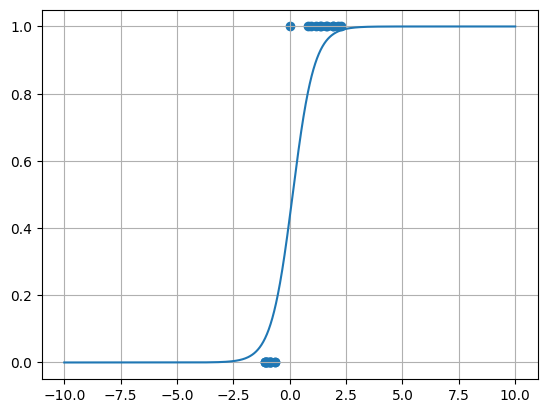

In [25]:
x = np.linspace(-10, 10, num=1000)
plt.grid()
plt.plot(x, 1/(1+np.exp(-(a * x + b))))
plt.scatter(df['x'],df['y'])

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [20]:
x, y = make_classification(n_samples=25, n_features=1, n_informative=1, n_clusters_per_class=1, n_redundant=0, random_state=42)

x = np.squeeze(x)

display(x, y)

array([-1.02973923, -1.09967637, -1.05036398, -0.88330092, -1.05036045,
       -0.86068886, -0.67241196,  2.26075937,  1.93884031, -1.10017367,
       -0.66032758,  1.66740684, -0.8931619 ,  1.14877569,  1.59834406,
        1.93064   , -1.10097911,  1.35872195,  2.13663763,  0.79292617,
       -0.94795641,  1.37052035,  0.03420817, -0.83493269,  0.95550217])

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

In [26]:
a = 1
b = 1
nu = 0.1
n_iter = 100

y_pred_proba = 1 / (1 + np.exp(-(a * x + b)))

for i in range(n_iter):
    
    err = y - y_pred_proba
    
    a_change = x * err
    b_change = err
    
    a += nu * a_change.sum()
    b += nu * b_change.sum()
    
    y_pred_proba = 1 / (1 + np.exp(-(a * x + b)))
    
    err = y - y_pred_proba
    
    log_loss = y * (np.log(y_pred_proba)) + (1 - y) * (np.log(1 - y_pred_proba))
    
    y_pred = np.where(y_pred_proba >= 0.5, 1, 0)
    
    if i % 10 == 0:
        print(log_loss.mean())
         


-0.18481471609624792
-0.05924747460798012
-0.0451127839555424
-0.03784558396760888
-0.03301062653170654
-0.02943589446833501
-0.026637468511673118
-0.02436604056351934
-0.02247517860352951
-0.020871156821238645


In [43]:
np.log(10 / 2)

np.float64(1.6094379124341003)

-----------------

In [71]:
X, y = make_classification(n_samples=25, n_features=2, n_informative=1, n_clusters_per_class=1, n_redundant=0, random_state=42)

In [49]:
X = np.c_[np.ones_like(X[:, 0]), X[:, 0], X[:, 1]]
X

array([[ 1.        , -0.11564828,  1.37052035],
       [ 1.        ,  0.82254491, -0.83493269],
       [ 1.        ,  0.34361829,  1.14877569],
       [ 1.        , -0.60063869, -1.02973923],
       [ 1.        , -0.01349722, -1.05036045],
       [ 1.        , -0.29169375, -0.86068886],
       [ 1.        , -0.71984421,  1.59834406],
       [ 1.        , -1.32818605, -1.10017367],
       [ 1.        ,  0.32408397,  1.93884031],
       [ 1.        , -1.95967012, -1.09967637],
       [ 1.        , -0.3011037 ,  1.66740684],
       [ 1.        ,  1.85227818, -1.05036398],
       [ 1.        , -0.46063877,  1.93064   ],
       [ 1.        , -1.47852199,  0.79292617],
       [ 1.        , -0.60170661, -0.67241196],
       [ 1.        ,  0.11092259, -0.8931619 ],
       [ 1.        , -0.38508228,  1.35872195],
       [ 1.        ,  0.19686124, -0.94795641],
       [ 1.        ,  0.2088636 , -0.88330092],
       [ 1.        ,  1.05712223,  0.03420817],
       [ 1.        ,  0.17136828,  2.136

In [50]:
X.shape[1]

3

In [59]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [61]:
eps = 0.0001

# первоначальное точка
np.random.seed(8)
W = np.random.randn(X.shape[1])

# размер шага (learning rate)
learning_rate = 0.001

next_W = W

# количество итерация 
n = 250
for i in range(n):
    cur_W = next_W

    # движение в негативную сторону вычисляемого градиента
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)

    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 70 == 0:
        print(f"Итерация: {i}")
        # print(f"Текущая точка {cur_W}| Следующая точка {next_W}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------") 


Итерация: 0
Logloss 2.2543634631282914
Accuracy 0.08
--------------------------------------------------------
Итерация: 70
Logloss 0.7801870356996633
Accuracy 0.48
--------------------------------------------------------
Итерация: 140
Logloss 0.2144217588503013
Accuracy 0.92
--------------------------------------------------------
Итерация: 210
Logloss 0.10798555006697576
Accuracy 0.96
--------------------------------------------------------


In [62]:
print(y_proba)
print(y_class)

[0.99237805 0.18557058 0.9903464  0.0243591  0.04246271 0.05807259
 0.9930974  0.00880978 0.99929155 0.00443672 0.99652539 0.25518655
 0.99828112 0.80903844 0.07612071 0.07917316 0.98938013 0.07291698
 0.09002535 0.84355133 0.99956768 0.00987225 0.04947453 0.99984663
 0.84233804]
[1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1]


In [73]:
model_my = LogisticRegression()
model_my.fit(X.reshape(-1, 2), y)

LogisticRegression()

In [74]:
y_pred_sk = model_my.predict(X.reshape(-1, 2))

In [78]:
print( (y_class != y_pred_sk).sum())

0
